# Data Wargling (Join)
 - (inner, outer, left, right)
         - outer (first All same then different)
         - inner (Only same values in both)
         - left (First all left then same value with right)
         - right (First all right values then same values from right) 
 - df.join()
 - df.merge()
 - pd.concat()

# Group by
 - df.groupby(by)
 - unstact
 - pivot_Table

# Handling Missing Values

In [2]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=20), # cif id unique id
                   "Account No":np.random.randint(1,5, size=(20))})

df1.drop_duplicates(inplace=True)
df1
#12345-1234567-3
#1234512345673


,CNIC,Account No
0,16,1
1,4,1
2,10,2
3,8,2
4,1,3
5,8,3
6,12,1
7,14,4
8,9,2
9,19,4


In [3]:
df1[df1.duplicated()]

,CNIC,Account No


In [4]:
a = df1.drop_duplicates()
print(len(a))

20


In [5]:
a = df1.drop_duplicates(subset='CNIC')
print(len(a))

13


In [6]:
a = df1.drop_duplicates(subset='CNIC', keep='last')
print(len(a))

13


In [7]:
a = df1.drop_duplicates(subset=['CNIC','Account No'], keep='last')
print(len(a))

20


In [8]:
size = 5000
df2 = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "Account No":np.random.randint(1,10, size=(size)),
                   "Mobile No":np.random.randint(2001,3000, size=(size)),
                  "DOB":pd.date_range('1690-01-01', periods=size, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(size))],
                   "Gender":np.random.choice(["M","F"], size=(size)),
                   "Balance": np.random.randint(1,1000000, size=(size))})
df2.drop_duplicates(inplace=True)
print(len(df2))
df2

5000


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,4173,8,2566,1690-01-31,H,F,863154
1,4913,8,2522,1690-02-28,P,M,59025
2,3035,7,2424,1690-03-31,X,M,501594
3,4826,7,2145,1690-04-30,B,F,842146
4,10,6,2385,1690-05-31,Q,M,239495
...,...,...,...,...,...,...,...
4995,2205,6,2032,2106-04-30,U,M,369271
4996,542,8,2175,2106-05-31,N,M,98825
4997,3826,4,2347,2106-06-30,R,F,32668
4998,454,4,2038,2106-07-31,T,M,326223


In [9]:
df2.columns[np.in1d(df2.columns,df1.columns)]

Index(['CNIC', 'Account No'], dtype='object')

In [10]:
df2[df2.CNIC==4]

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
3385,4,5,2682,1972-02-29,R,F,70138


In [11]:
print(df1.dtypes, df2.dtypes, sep="\n\n\n")

CNIC          int32
Account No    int32
dtype: object


CNIC                     int32
Account No               int32
Mobile No                int32
DOB             datetime64[ns]
CustomerName            object
Gender                  object
Balance                  int32
dtype: object


### data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")

In [12]:
a = df1.merge(df2, on="CNIC", how='inner')
print(len(df1))
print(len(df2))
print(len(a))
a

20
5000
23


,CNIC,Account No_x,Account No_y,Mobile No,DOB,CustomerName,Gender,Balance
0,4,1,5,2682,1972-02-29,R,F,70138
1,10,2,6,2385,1690-05-31,Q,M,239495
2,10,2,1,2287,1984-02-29,H,M,507572
3,1,3,9,2889,1750-01-31,F,F,302305
4,1,3,5,2168,1840-08-31,J,M,595554
5,1,3,3,2039,1941-06-30,E,F,932481
6,1,1,9,2889,1750-01-31,F,F,302305
7,1,1,5,2168,1840-08-31,J,M,595554
8,1,1,3,2039,1941-06-30,E,F,932481
9,12,1,5,2659,1919-03-31,G,F,719052


### data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

In [13]:
a = df1.merge(df2, on=["CNIC","Account No"], how="inner") #Join with multiples columns
print(len(df1))
print(len(df2))
print(len(a))
a

20
5000
2


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,1,3,2039,1941-06-30,E,F,932481
1,9,2,2109,1993-12-31,P,M,617431


##### data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

In [14]:
df1.columns

Index(['CNIC', 'Account No'], dtype='object')

In [15]:
df1.columns = ['Customer CNIC', 'Customer Account No']
df1.head(2)

,Customer CNIC,Customer Account No
0,16,1
1,4,1


In [16]:
df2.head(2)

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,4173,8,2566,1690-01-31,H,F,863154
1,4913,8,2522,1690-02-28,P,M,59025


In [17]:
a = df1.merge(df2, left_on="Customer CNIC", right_on="CNIC")
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,4,1,4,5,2682,1972-02-29,R,F,70138
1,10,2,10,6,2385,1690-05-31,Q,M,239495
2,10,2,10,1,2287,1984-02-29,H,M,507572
3,1,3,1,9,2889,1750-01-31,F,F,302305
4,1,3,1,5,2168,1840-08-31,J,M,595554
5,1,3,1,3,2039,1941-06-30,E,F,932481
6,1,1,1,9,2889,1750-01-31,F,F,302305
7,1,1,1,5,2168,1840-08-31,J,M,595554
8,1,1,1,3,2039,1941-06-30,E,F,932481
9,12,1,12,5,2659,1919-03-31,G,F,719052


In [18]:
a = df1.merge(df2, left_on=["Customer CNIC","Customer Account No"], right_on=["CNIC","Account No"])
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,1,3,1,3,2039,1941-06-30,E,F,932481
1,9,2,9,2,2109,1993-12-31,P,M,617431


In [19]:
a[["CNIC","CustomerName","Mobile No"]]

,CNIC,CustomerName,Mobile No
0,1,E,2039
1,9,P,2109


##### data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')


In [20]:
customers = pd.DataFrame({"Customers NIC": [14,6,19,22],"Customer Name":["A","B","C","D"]})


transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20))})


customers

,Customers NIC,Customer Name
0,14,A
1,6,B
2,19,C
3,22,D


In [21]:
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount
0,14,1,1990-01-31,TopUP,311136
1,19,1,1990-02-28,FT,591044
2,14,1,1990-03-31,FT,906202
3,14,1,1990-04-30,FT,397401
4,21,1,1990-05-31,TopUP,179259
5,19,1,1990-06-30,FT,192686
6,21,1,1990-07-31,IBFT,79227
7,6,1,1990-08-31,IBFT,264459
8,6,1,1990-09-30,IBFT,768812
9,19,1,1990-10-31,FT,273162


In [22]:
def fee_charges(x):
  if x>=1 and x<=100000:
    return 10
  elif x>100000 and x<=1000000:
    return 50
  else:
    return 100

transactions['fee'] = transactions.Amount.apply(fee_charges)
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,14,1,1990-01-31,TopUP,311136,50
1,19,1,1990-02-28,FT,591044,50
2,14,1,1990-03-31,FT,906202,50
3,14,1,1990-04-30,FT,397401,50
4,21,1,1990-05-31,TopUP,179259,50
5,19,1,1990-06-30,FT,192686,50
6,21,1,1990-07-31,IBFT,79227,10
7,6,1,1990-08-31,IBFT,264459,50
8,6,1,1990-09-30,IBFT,768812,50
9,19,1,1990-10-31,FT,273162,50


In [23]:
c = transactions.CNIC.value_counts()
print(c.index)
print(c.values)
print()
print(c)

Int64Index([21, 19, 14, 6], dtype='int64')
[5 5 5 5]

21    5
19    5
14    5
6     5
Name: CNIC, dtype: int64


In [24]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='left')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,5.0
1,6,B,5.0
2,19,C,5.0
3,22,D,NaN


In [25]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='right')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
NaN,21,NaN,5
2.0,19,C,5
0.0,14,A,5
1.0,6,B,5


In [26]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='inner')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,5
1,6,B,5
2,19,C,5


In [27]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='outer')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,5.0
1.0,6,B,5.0
2.0,19,C,5.0
3.0,22,D,NaN
NaN,21,NaN,5.0


# Slabs
* pd.cut(series)
* pd.qcut(series)

In [47]:
size = 5000
df2 = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "Account No":np.random.randint(1,10, size=(size)),
                   "Mobile No":np.random.randint(2001,3000, size=(size)),
                  "DOB":pd.date_range('1690-01-01', periods=size, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(size))],
                   "Gender":np.random.choice(["M","F"], size=(size)),
                   "Balance": np.random.randint(1,1000000, size=(size))})
df2.drop_duplicates(inplace=True)
print(len(df2))
df2

5000


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,3258,3,2585,1690-01-31,W,M,651305
1,3755,4,2265,1690-02-28,M,M,980631
2,4834,9,2132,1690-03-31,E,M,781593
3,3504,9,2926,1690-04-30,R,M,832862
4,777,1,2522,1690-05-31,B,F,377390
...,...,...,...,...,...,...,...
4995,3972,8,2841,2106-04-30,B,F,63979
4996,4367,7,2004,2106-05-31,X,F,385768
4997,1398,6,2155,2106-06-30,E,M,472241
4998,2812,1,2438,2106-07-31,D,M,50494


In [48]:
def slab(amount):
    if amount >= 1000000: return 60
    elif amount >= 500000 : return 55
    elif amount >= 100000 : return 50
    elif amount >= 50000 : return 45
    elif amount >= 10000 : return 40
    elif amount >= 5000 : return 35
    else: return 30

In [49]:
df2['slabOne'] = df2['Balance'].apply(slab)

In [50]:
df2.slabOne.value_counts()

55    2500
50    1999
45     243
40     206
35      26
30      26
Name: slabOne, dtype: int64

In [51]:
transactions.head(2)

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,14,1,1990-01-31,TopUP,311136,50
1,19,1,1990-02-28,FT,591044,50


In [53]:
slabs = [1, 1000, 5000,10000,20000,50000,100000,500000,1000000]
print(pd.cut(df2['Balance'],slabs))
pd.cut(df2['Balance'],slabs).value_counts()

0       (500000, 1000000]
1       (500000, 1000000]
2       (500000, 1000000]
3       (500000, 1000000]
4        (100000, 500000]
              ...        
4995      (50000, 100000]
4996     (100000, 500000]
4997     (100000, 500000]
4998      (50000, 100000]
4999     (100000, 500000]
Name: Balance, Length: 5000, dtype: category
Categories (8, interval[int64]): [(1, 1000] < (1000, 5000] < (5000, 10000] < (10000, 20000] < (20000, 50000] < (50000, 100000] < (100000, 500000] < (500000, 1000000]]


(500000, 1000000]    2500
(100000, 500000]     1999
(50000, 100000]       243
(20000, 50000]        158
(10000, 20000]         48
(5000, 10000]          26
(1000, 5000]           20
(1, 1000]               6
Name: Balance, dtype: int64

In [67]:
pd.cut(df2['Balance'],slabs, labels=[25,30,35,40,45,50,55,60]).value_counts()

60    2500
55    1999
50     243
45     158
40      48
35      26
30      20
25       6
Name: Balance, dtype: int64

In [68]:
slabs_percentile = [0, 0.5, 0.8, 0.95, 1]
pd.qcut(df2['Balance'],slabs_percentile)

0        (500071.0, 799308.8]
1       (954974.45, 999910.0]
2        (500071.0, 799308.8]
3       (799308.8, 954974.45]
4         (181.999, 500071.0]
                ...          
4995      (181.999, 500071.0]
4996      (181.999, 500071.0]
4997      (181.999, 500071.0]
4998      (181.999, 500071.0]
4999      (181.999, 500071.0]
Name: Balance, Length: 5000, dtype: category
Categories (4, interval[float64]): [(181.999, 500071.0] < (500071.0, 799308.8] < (799308.8, 954974.45] < (954974.45, 999910.0]]

In [70]:
pd.qcut(df2['Balance'],slabs_percentile).value_counts()

(181.999, 500071.0]      2500
(500071.0, 799308.8]     1500
(799308.8, 954974.45]     750
(954974.45, 999910.0]     250
Name: Balance, dtype: int64

In [72]:
pd.qcut(df2['Balance'],slabs_percentile).value_counts()/5000*100

(181.999, 500071.0]      50.0
(500071.0, 799308.8]     30.0
(799308.8, 954974.45]    15.0
(954974.45, 999910.0]     5.0
Name: Balance, dtype: float64

# Group by

In [73]:
#dataframeName.groupby("Col").agg([count])             optional(min,max,avg,sum, std)(int,float)
#dataframeName.groupby(by="Col")[["colname"]].agg([count]) 
#dataframeName.groupby(by=[col1,col2,..]).agg([count]) 

In [86]:
size = 5000
transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(size)),
                   "TransactionID":np.random.randint(1,2, size=(size)),
                  "Transaction Date":pd.date_range('1690-01-01', periods=size, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(size)),
                            "Amount":np.random.randint(1,1000000, size=(size)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(size))})
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1690-01-31,IBFT,275707,Karachi
1,19,1,1690-02-28,FT,367547,Karachi
2,19,1,1690-03-31,TopUP,819358,Lahore
3,19,1,1690-04-30,IBFT,81622,Karachi
4,6,1,1690-05-31,IBFT,147019,Lahore
...,...,...,...,...,...,...
4995,21,1,2106-04-30,TopUP,766412,Islamabad
4996,6,1,2106-05-31,IBFT,850970,Lahore
4997,21,1,2106-06-30,IBFT,847017,Karachi
4998,21,1,2106-07-31,FT,488318,Karachi


In [76]:
transactions.groupby("City").agg(['count'])

,CNIC,TransactionID,Transaction Date,Description,Amount
,count,count,count,count,count
City,,,,,
Islamabad,7,7,7,7,7
Karachi,4,4,4,4,4
Lahore,9,9,9,9,9


In [77]:
a = transactions.groupby("City")[["CNIC"]].agg(['count'])
a

,CNIC
,count
City,
Islamabad,7
Karachi,4
Lahore,9


In [78]:
a = transactions.groupby("City")[["City"]].agg(['count'])
a

,City
,count
City,
Islamabad,7
Karachi,4
Lahore,9


In [82]:
transactions.groupby("City")[["Amount"]].agg(['count',min,max, np.mean, np.std])
#transactions.groupby("City").Amount.agg(['count',min,max, np.mean, np.std])

Amount                                              
           count     min     max           mean            std
City                                                          
Islamabad      7  198051  888215  492885.857143  261516.205553
Karachi        4   95240  752359  448080.500000  287396.401685
Lahore         9   67089  787368  434062.000000  241811.680573

In [83]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std])
a

count     min     max       mean            std
City      Description                                                 
Islamabad FT               4  198051  750979  426536.25  275135.824772
          IBFT             3  406590  888215  581352.00  266605.824781
Karachi   FT               2  350852  593871  472361.50  171840.382857
          IBFT             1   95240   95240   95240.00            NaN
          TopUP            1  752359  752359  752359.00            NaN
Lahore    FT               2  175041  521826  348433.50  245214.025114
          IBFT             5   67089  787368  446984.00  296621.592349
          TopUP            2  355990  618781  487385.50  185821.298135

In [ ]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std,'sum']).reset_index()
a = a.sort_values(by=["City",'count'], ascending=[True,False])
a.to_excel("output.xlsx", index=False)

In [ ]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std]).unstack()
a

Categorical data/nominal data
'orange','mango'


ordinal data
1,3,2,4 (discreate/countinues)
A,B,C
a,b,c
i,ii,iii

In [ ]:
a = input("Enter no")
a.split(",")



In [ ]:
list(str('232'))

In [ ]:
transactions.groupby([transactions['Transaction Date'].dt.year, "City","CNIC"]).agg(['count'])

In [ ]:
transactions.head()

In [ ]:
a = transactions.groupby(["City","Description"]).\
TransactionID.agg(['count']).unstack()

a.plot(kind='bar')
a

In [ ]:
b = transactions.pivot_table(index="City", columns="Description", aggfunc=["count",'sum'])
b

In [3]:
size = 5000
df2 = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "Account No":np.random.randint(1,10, size=(size)),
                   "Mobile No":np.random.randint(2001,3000, size=(size)),
                  "DOB":pd.date_range('1690-01-01', periods=size, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(size))],
                   "Gender":np.random.choice(["M","F"], size=(size)),
                    "currency":np.random.choice(["036","051","106","105"], size=(size)),
                   "Balance": np.random.randint(1,1000000, size=(size))})
df2.drop_duplicates(inplace=True)
print(len(df2))
df2

5000


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,currency,Balance
0,4661,6,2936,1690-01-31,Q,M,106,835162
1,1403,7,2358,1690-02-28,L,F,036,815234
2,3130,7,2557,1690-03-31,Z,M,051,110585
3,3761,5,2421,1690-04-30,N,F,036,364262
4,4730,4,2928,1690-05-31,I,M,036,806311
...,...,...,...,...,...,...,...,...
4995,2828,9,2171,2106-04-30,N,F,036,93317
4996,1255,4,2044,2106-05-31,X,F,105,449343
4997,743,2,2196,2106-06-30,K,M,105,351152
4998,1835,4,2922,2106-07-31,M,M,106,624308


In [12]:
size = 5000
transactions = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "TransactionID":np.arange(1,size+1),
                  "Transaction Date":pd.date_range('1690-01-01', periods=size, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(size)),
                            "Amount":np.random.randint(1,1000000, size=(size)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(size))})
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,1989,1,1690-01-31,IBFT,85561,Lahore
1,4213,2,1690-02-28,FT,416578,Karachi
2,1617,3,1690-03-31,TopUP,443605,Lahore
3,3568,4,1690-04-30,TopUP,211052,Lahore
4,3328,5,1690-05-31,IBFT,738432,Lahore
...,...,...,...,...,...,...
4995,4335,4996,2106-04-30,FT,325210,Lahore
4996,3121,4997,2106-05-31,FT,863470,Islamabad
4997,1654,4998,2106-06-30,IBFT,47096,Lahore
4998,2354,4999,2106-07-31,TopUP,608599,Karachi


### Apply any function with groupby()

In [15]:
transactions.groupby([transactions.City]).CNIC

In [16]:
# transactions.groupby(['City'])
transactions.groupby([transactions.City]).CNIC.unique()

City
Islamabad    [263, 3056, 28, 745, 1165, 1942, 4401, 190, 35...
Karachi      [4213, 1169, 1319, 351, 4798, 3322, 1944, 2696...
Lahore       [1989, 1617, 3568, 3328, 325, 2069, 4810, 3771...
Name: CNIC, dtype: object

In [17]:
transactions.groupby([transactions.City]).CNIC.unique().apply(len)

City
Islamabad    1385
Karachi      1431
Lahore       1436
Name: CNIC, dtype: int64

In [19]:
transactions.pivot_table("CNIC","City","Description") # by default mean

Description,FT,IBFT,TopUP
City,,,
Islamabad,2472.040708,2409.333945,2537.835907
Karachi,2576.470588,2421.647668,2586.335689
Lahore,2484.949495,2478.859459,2557.825771


In [20]:
#count all transaction according to description column
transactions.pivot_table("CNIC","City","Description", aggfunc='count')

Description,FT,IBFT,TopUP
City,,,
Islamabad,565,545,518
Karachi,527,579,566
Lahore,594,555,551


In [23]:
# count  all unique customer cnic according to descriotion columns
transactions.groupby(['City','Description']).CNIC.unique().apply(len)

City       Description
Islamabad  FT             534
           IBFT           513
           TopUP          493
Karachi    FT             496
           IBFT           546
           TopUP          533
Lahore     FT             560
           IBFT           525
           TopUP          526
Name: CNIC, dtype: int64

In [24]:
pd.DataFrame(transactions.groupby(['City','Description']).CNIC.unique().apply(len))

CNIC
City      Description      
Islamabad FT            534
          IBFT          513
          TopUP         493
Karachi   FT            496
          IBFT          546
          TopUP         533
Lahore    FT            560
          IBFT          525
          TopUP         526

In [25]:
pd.DataFrame(transactions.groupby(['City','Description']).CNIC.unique().apply(len)).unstack()

CNIC           
Description   FT IBFT TopUP
City                       
Islamabad    534  513   493
Karachi      496  546   533
Lahore       560  525   526

In [26]:
a = pd.DataFrame(transactions.groupby(['City','Description']).CNIC.unique().apply(len)).unstack()
a.loc[["Karachi"]]

CNIC           
Description   FT IBFT TopUP
City                       
Karachi      496  546   533

In [30]:
#Unique customrers who did transaction in last 6 months
transactions[(transactions['Transaction Date'] >= '2020-10-10') &
              (transactions['Transaction Date'] <= '2021-04-09')]

,CNIC,TransactionID,Transaction Date,Description,Amount,City
3969,125,3970,2020-10-31,FT,48566,Karachi
3970,1190,3971,2020-11-30,FT,79383,Karachi
3971,3983,3972,2020-12-31,FT,715629,Karachi
3972,3139,3973,2021-01-31,IBFT,467715,Lahore
3973,2461,3974,2021-02-28,FT,150753,Islamabad
3974,339,3975,2021-03-31,IBFT,798130,Karachi


In [35]:
transactive = transactions[(transactions['Transaction Date'] >= '2020-10-10') &
              (transactions['Transaction Date'] <= '2021-04-09')]
print(len(transactive))
transactive

6


,CNIC,TransactionID,Transaction Date,Description,Amount,City
3969,125,3970,2020-10-31,FT,48566,Karachi
3970,1190,3971,2020-11-30,FT,79383,Karachi
3971,3983,3972,2020-12-31,FT,715629,Karachi
3972,3139,3973,2021-01-31,IBFT,467715,Lahore
3973,2461,3974,2021-02-28,FT,150753,Islamabad
3974,339,3975,2021-03-31,IBFT,798130,Karachi


In [ ]:
#find how many customers transacting customers in

In [36]:
np.in1d([1,2,20,25,35], [685,758,510,432,509,113,1, 25])

array([ True, False, False,  True, False])

In [37]:
np.in1d([1,2,20,25,35], [685,758,510,432,509,113,1, 25]).sum()

2

In [42]:
def check_transacting(x):
    return np.in1d(x,transactive).sum()

In [44]:
pd.DataFrame(transactions.groupby(['City','Description']).CNIC.unique().apply(check_transacting).unstack())

C:\Users\qasim\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Description,FT,IBFT,TopUP
City,,,
Islamabad,2,1,1
Karachi,3,4,1
Lahore,4,4,1


<AxesSubplot:xlabel='City'>

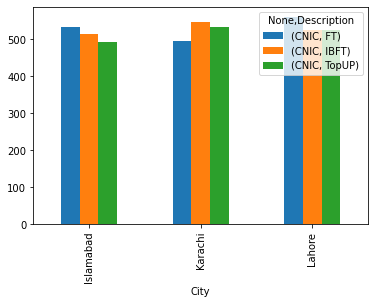

In [45]:
a.plot(kind= 'bar')

<AxesSubplot:xlabel='City'>

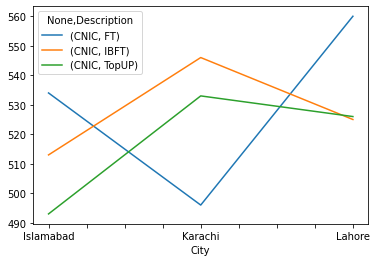

In [47]:
a.plot(kind= 'line')

<AxesSubplot:ylabel='Frequency'>

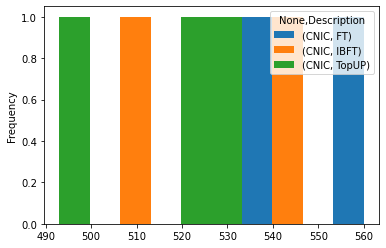

In [51]:
a.plot(kind= 'hist')

<AxesSubplot:xlabel='City'>

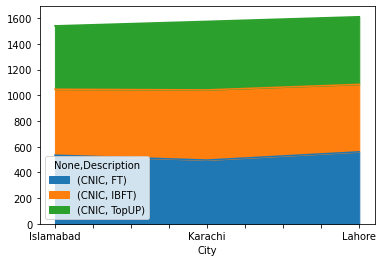

In [52]:
a.plot(kind= 'area')